In [2]:
from struct import unpack
from pylab import *
#import exotoolbox
import seaborn as sns
import pickle
import juliet
from matplotlib import rcParams

In [3]:
def bin_data(x,y,n_bin):
    x_bins = []
    y_bins = []
    y_err_bins = []
    for i in range(0,len(x),n_bin):
        x_bins.append(np.median(x[i:i+n_bin-1]))
        y_bins.append(np.median(y[i:i+n_bin-1]))
        y_err_bins.append(np.sqrt(np.var(y[i:i+n_bin-1]))/np.sqrt(len(y[i:i+n_bin-1])))
    return np.array(x_bins),np.array(y_bins),np.array(y_err_bins)

In [4]:
sns.set_context("talk")
sns.set_style("ticks")

# Fonts:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams.update({'font.size':12})
plt.rc('legend', **{'fontsize':7})

# Ticks to the outside:
rcParams['axes.linewidth'] = 1.2 
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

In [5]:
# Analysed data
dataset = juliet.load(input_folder='multisector_in_transit_ExpMatern')
res1 = dataset.fit(sampler='dynamic_dynesty')
# Making phases
P, t0 = np.median(res1.posteriors['posterior_samples']['P_p1']),\
        np.median(res1.posteriors['posterior_samples']['t0_p1'])

depth, depth_pe, depth_ne = np.loadtxt('depth.dat', usecols=(1,2,3), unpack=True)
#

sectors = ['TESS1', 'TESS2', 'TESS3', 'TESS4', 'TESS6', 'TESS7', 'TESS8', 'TESS9', 'TESS10', 'TESS11', 'TESS12', 'TESS13', 'TESS27', 'TESS28', 'TESS29', 'TESS30', 'TESS31', 'TESS32', 'TESS33', 'TESS34']
#['WASP-126_sector0','WASP-126_sector10','WASP-126_sector11','WASP-126_sector12',\
           #'WASP-126_sector13','WASP-126_sector14','WASP-126_sector5','WASP-126_sector6','WASP-126_sector7',\
           #'WASP-126_sector8','WASP-126_sector9']
#print(len(sectors))
#print(sectors)

sectorname = np.loadtxt('depth.dat', usecols=0, unpack=True)
sname = np.loadtxt('depth.dat', usecols=0, unpack=True, dtype=str)
sname2 = np.arange(1,21,1)
#print(sectorname)
#print(len(sectorname))

#sectorname = [0,10,11,12,13,14,5,6,7,8,9]
parameter_name = 'r2_p1'
all_data = []
all_data_perr = []
all_data_nerr = []
samples = np.zeros([len(sectors),2000])
sigmas = np.zeros(len(sectors))

Detected dynamic_dynesty sampler output files --- extracting from multisector_in_transit_ExpMatern/_dynesty_DNS_posteriors.pkl


(-0.05, 0.05)

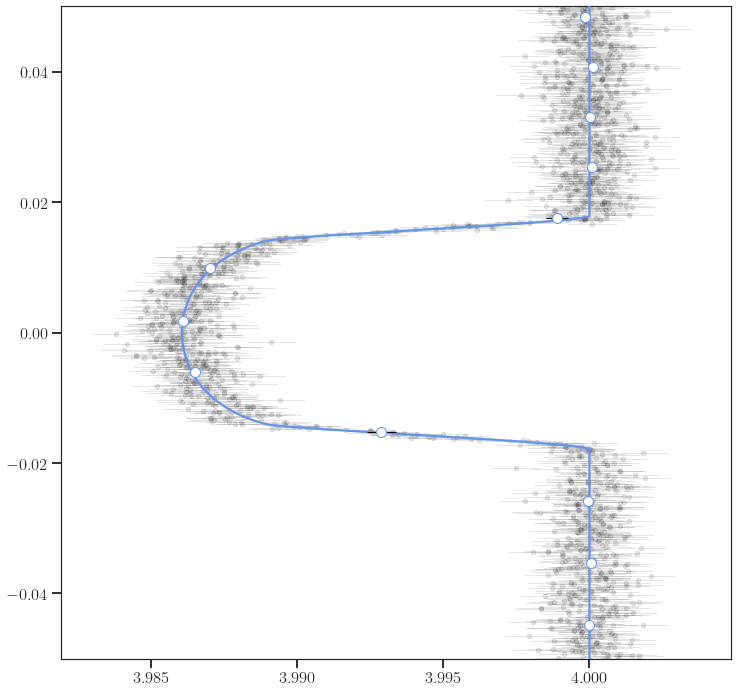

In [6]:
fig = plt.figure(figsize=(12,12))

sec = 'TESS3'

transit_plus_GP_model = res1.lc.evaluate(sec)
phase = juliet.get_phases(dataset.times_lc[sec], P, t0)
time,flux,flux_err = dataset.times_lc[sec], dataset.data_lc[sec], dataset.errors_lc[sec]
m5 = res1.lc.model[sec]['deterministic']#np.loadtxt(sectors[i]+'/results/exm1/phased_lc_planet1_TESS.dat',unpack=True)
factor = 1/np.max(m5)#-(0.8/np.min(m5-1.))
m = (m5)*factor + 3#(m5-1.)*factor + 3
flux = (flux)*factor + 3#(flux-1.)*factor + 3
flux_err = flux_err*factor
# For GP
gp_model1 = res1.lc.model[sec]['GP']
fac1 = 0.8/np.min(gp_model1-1.)
gp2 = gp_model1
idx = np.argsort(phase)
xbin,ybin,ybin_err = bin_data(phase[idx],flux[idx] - gp2[idx],120)
#print sectorname[i],'1hr error:',np,median(ybin_err)*1e6
plt.errorbar(flux-gp2,phase,xerr=flux_err,fmt='.',elinewidth=1,color='black',alpha=0.1,zorder=1)
plt.errorbar(ybin,xbin,xerr=ybin_err,fmt='o',markeredgewidth=1,ms=10,elinewidth=1,ecolor='black',mec='cornflowerblue',mfc='white',zorder=5)
plt.plot(m[idx],phase[idx],color='cornflowerblue',zorder=3)
plt.ylim([-0.050, 0.050])

In [7]:
print(3.-m)

[-1. -1. -1. ... -1. -1. -1.]


In [8]:
print(m5)

[0.99895787 0.99895787 0.99895787 ... 0.99895787 0.99895787 0.99895787]


In [9]:
fac = (m5-1.)/np.max(m5-1.)
print(fac)

[1. 1. 1. ... 1. 1. 1.]


(-0.05, 0.05)

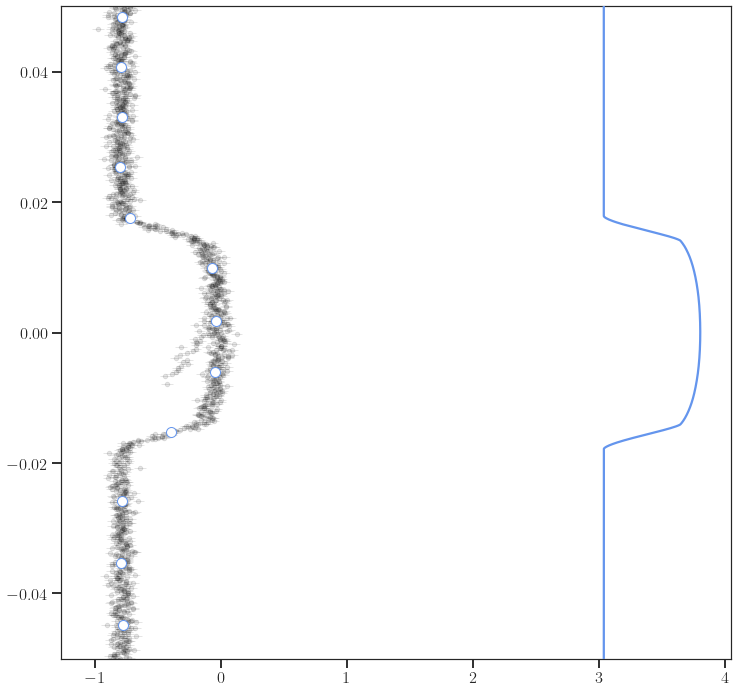

In [10]:
fig = plt.figure(figsize=(12,12))

sec = 'TESS3'

transit_plus_GP_model = res1.lc.evaluate(sec)
phase = juliet.get_phases(dataset.times_lc[sec], P, t0)
time,flux,flux_err = dataset.times_lc[sec], dataset.data_lc[sec], dataset.errors_lc[sec]
m = res1.lc.model[sec]['deterministic']#np.loadtxt(sectors[i]+'/results/exm1/phased_lc_planet1_TESS.dat',unpack=True)
factor = (0.8/np.min(m-1.))
m = (m-1.)*factor + 3 
flux = (flux-1.)*factor + 3
flux_err = flux_err*factor
# For GP
gp_model1 = res1.lc.model[sec]['GP']
factor1 = (0.8/np.min(gp_model1-1.))
gp_model1 = (gp_model1-1.)*factor1 + 3
idx = np.argsort(phase)
xbin,ybin,ybin_err = bin_data(phase[idx],flux[idx]-gp_model1[idx],120)
#print sectorname[i],'1hr error:',np,median(ybin_err)*1e6
plt.errorbar(flux-gp_model1,phase,xerr=flux_err,fmt='.',elinewidth=1,color='black',alpha=0.1,zorder=1)
plt.errorbar(ybin,xbin,xerr=ybin_err,fmt='o',markeredgewidth=1,ms=10,elinewidth=1,ecolor='black',mec='cornflowerblue',mfc='white',zorder=5)
plt.plot(m[idx],phase[idx],color='cornflowerblue',zorder=3)
plt.ylim([-0.050, 0.050])

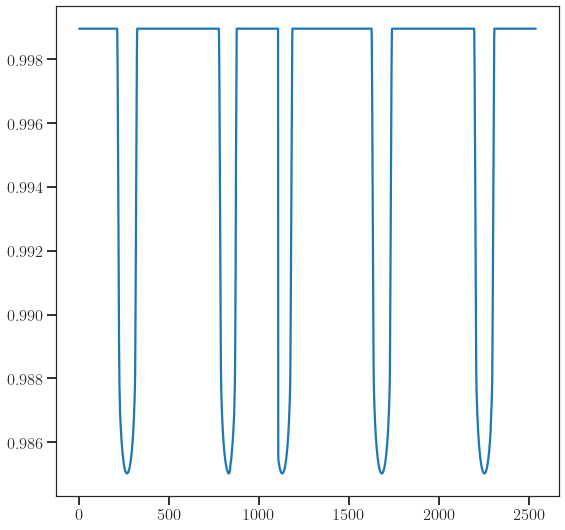

In [11]:
fig1 = plt.figure(figsize=(9,9))
plt.plot(m5)

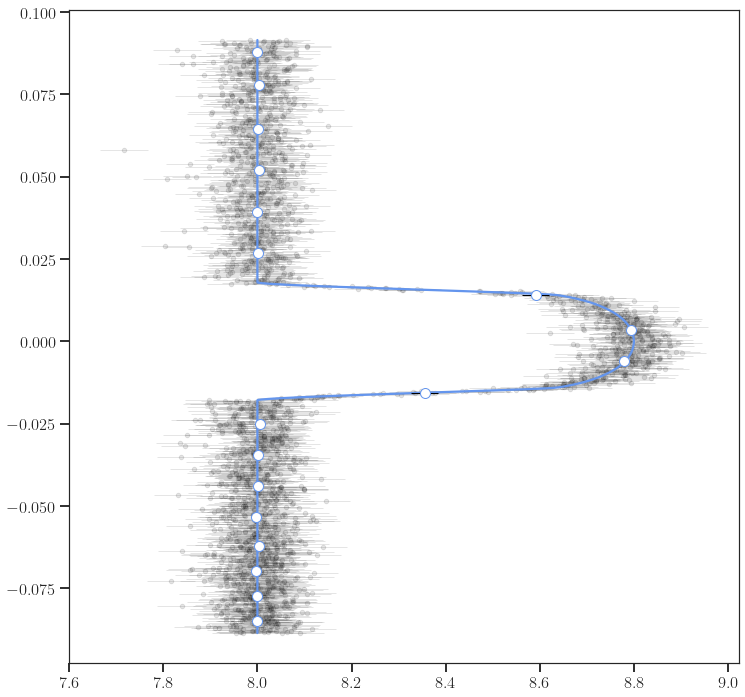

In [25]:
fig = plt.figure(figsize=(12,12))

sec = 'TESS8'
sec22 = 8

transit_plus_GP_model = res1.lc.evaluate(sec)
phase = juliet.get_phases(dataset.times_lc[sec], P, t0)
time,flux,flux_err = dataset.times_lc[sec], dataset.data_lc[sec], dataset.errors_lc[sec]
m = res1.lc.model[sec]['deterministic']#np.loadtxt(sectors[i]+'/results/exm1/phased_lc_planet1_TESS.dat',unpack=True)
# For GP
gp_model1 = res1.lc.model[sec]['GP']
#
fac1 = 1/np.max(m)
m = m*fac1
flux = flux*fac1
flux_err = flux_err*fac1
#
factor = (0.8/np.min(m-1.))
m = (m-1.)*factor + sec22#sname2[i] - 1
flux = (flux-1.-gp_model1)*factor + sec22#sname2[i] - 1
flux_err = flux_err*factor
idx = np.argsort(phase)
xbin,ybin,ybin_err = bin_data(phase[idx],flux[idx],120)
#print sectorname[i],'1hr error:',np,median(ybin_err)*1e6
plt.errorbar(flux,phase,xerr=flux_err,fmt='.',elinewidth=1,color='black',alpha=0.1,zorder=1)
plt.errorbar(ybin,xbin,xerr=ybin_err,fmt='o',markeredgewidth=1,ms=10,elinewidth=1,ecolor='black',mec='cornflowerblue',mfc='white',zorder=5)
plt.plot(m[idx],phase[idx],color='cornflowerblue',zorder=3)
#plt.ylim([-0.050, 0.050])

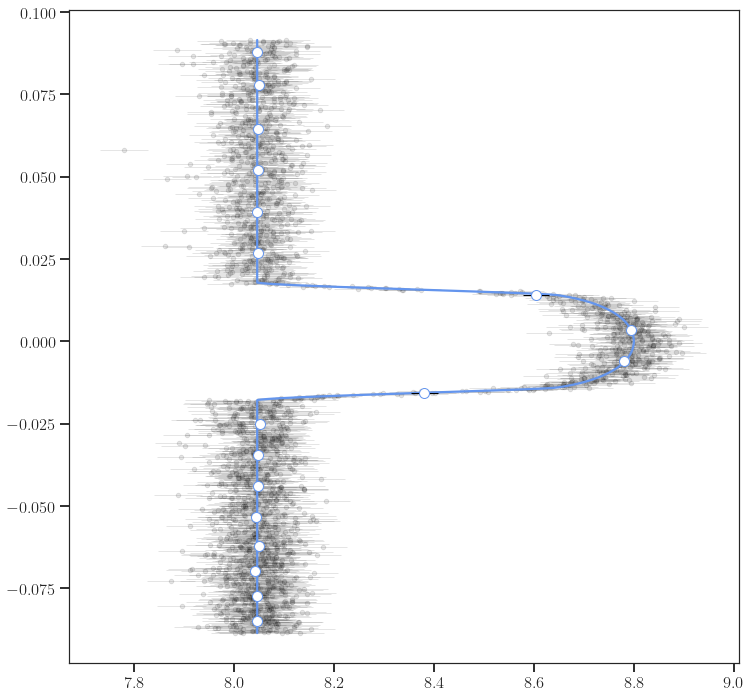

In [27]:
fig = plt.figure(figsize=(12,12))

sec = 'TESS8'
sec22 = 8

transit_plus_GP_model = res1.lc.evaluate(sec)
phase = juliet.get_phases(dataset.times_lc[sec], P, t0)
time,flux,flux_err = dataset.times_lc[sec], dataset.data_lc[sec], dataset.errors_lc[sec]
m = res1.lc.model[sec]['deterministic']#np.loadtxt(sectors[i]+'/results/exm1/phased_lc_planet1_TESS.dat',unpack=True)
# For GP
gp_model1 = res1.lc.model[sec]['GP']
flux = flux - gp_model1
#
#fac1 = 1/np.max(m)
#m = m*fac1
#flux = flux*fac1
#flux_err = flux_err*fac1
#
factor = (0.8/np.min(m-1.))
m = (m-1.)*factor + sec22#sname2[i] - 1
flux = (flux-1.)*factor + sec22#sname2[i] - 1
flux_err = flux_err*factor
idx = np.argsort(phase)
xbin,ybin,ybin_err = bin_data(phase[idx],flux[idx],120)
#print sectorname[i],'1hr error:',np,median(ybin_err)*1e6
plt.errorbar(flux,phase,xerr=flux_err,fmt='.',elinewidth=1,color='black',alpha=0.1,zorder=1)
plt.errorbar(ybin,xbin,xerr=ybin_err,fmt='o',markeredgewidth=1,ms=10,elinewidth=1,ecolor='black',mec='cornflowerblue',mfc='white',zorder=5)
plt.plot(m[idx],phase[idx],color='cornflowerblue',zorder=3)
#plt.ylim([-0.050, 0.050])